In [7]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
#export
from exp.datasets import *

In [17]:
#export
from pm4py.objects.log.importer.xes import factory as xes_import_factory
from pm4py.algo.discovery.simple.model.log import factory as simple_algorithm
from pm4py.algo.discovery.alpha import factory as alpha_miner
from pm4py.visualization.petrinet import factory as vis_petri
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
from pm4py.visualization.heuristics_net import factory as vis_heu
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory


In [117]:
bpic2012=untar_data(URLs.BPIC_2012)

## Process Discovery

In [18]:
#export
def import_xes(path_or_str):
    log = xes_import_factory.apply(str(path_or_str))
    return log

def run_alpha_miner(log):
    net, initial_marking, final_marking = alpha_miner.apply(log)
    #gviz = vis_petri.apply(net, initial_marking, final_marking)
    #vis_petri.view(gviz)
    return net, initial_marking, final_marking
def run_simple_miner(log,classic_output=True,parameters={"max_no_variants": 20}):
    net, initial_marking, final_marking = simple_algorithm.apply(log, classic_output=classic_output, parameters=parameters)
    #gviz = vis_petri.apply(net, initial_marking, final_marking)
    #vis_petri.view(gviz)
    return net, initial_marking, final_marking
def run_heuristic_net(log,parameters={"dependency_thresh": 0.99}):
    heu_net = heuristics_miner.apply_heu(log, parameters)
    #gviz = vis_heu.apply(heu_net)
    #vis_heu.view(gviz)
    return heu_net
def run_heuristic_miner(log,parameters={"dependency_thresh": 0.99}):
    net, initial_marking, final_marking = heuristics_miner.apply(log, parameters)
    #gviz = vis_petri.apply(net, initial_marking, final_marking)
    #vis_petri.view(gviz)
    return net, initial_marking, final_marking
def run_inductive_miner(log,parameters={}):
    net, initial_marking, final_marking = inductive_miner.apply(log,parameters=parameters)
    #gviz = vis_petri.apply(net, initial_marking, final_marking)
    #vis_petri.view(gviz)
    return net, initial_marking, final_marking
def run_dfg_miner(log,variant="frequency"):
    dfg = dfg_factory.apply(log)
    #gviz = dfg_vis_factory.apply(dfg, log=log, variant=variant)
    #dfg_vis_factory.view(gviz)
    return dfg

In [126]:
%time log=import_xes(str(bpic2012))

CPU times: user 8.61 s, sys: 260 ms, total: 8.87 s
Wall time: 8.87 s


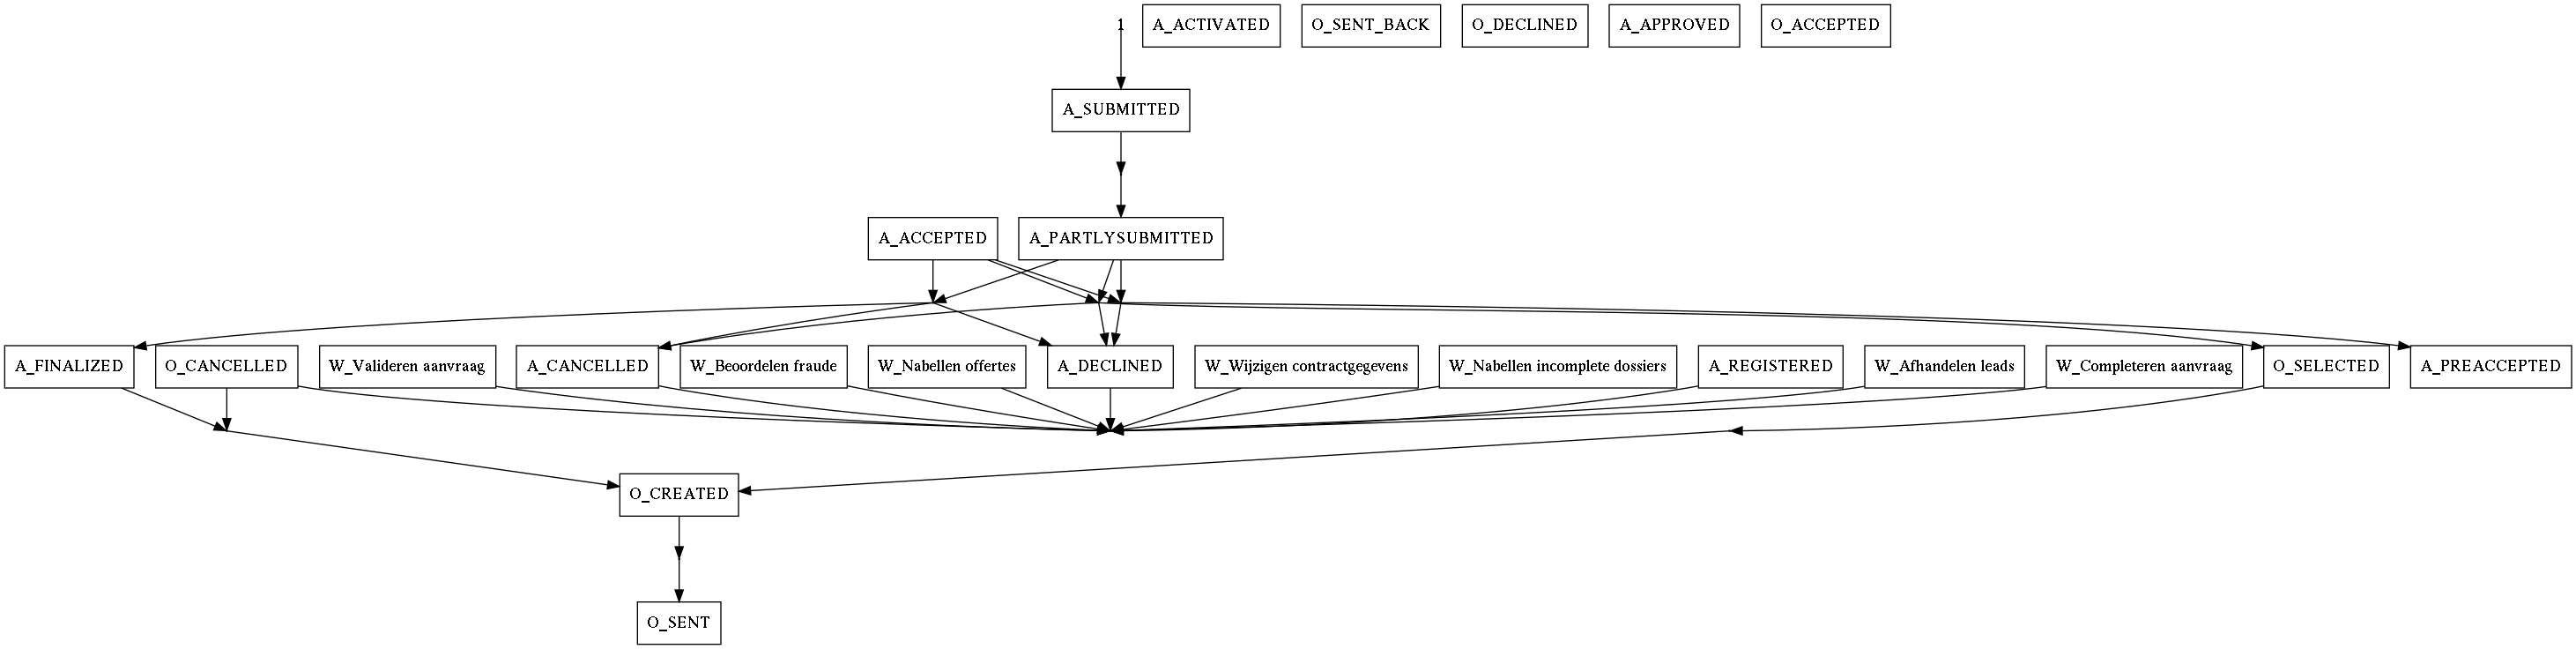

CPU times: user 372 ms, sys: 16.3 ms, total: 389 ms
Wall time: 498 ms


(<pm4py.objects.petri.petrinet.PetriNet at 0x7f70bfcc02d0>,
 ['start:1'],
 ['end:1'])

In [127]:
%time run_alpha_miner(log)

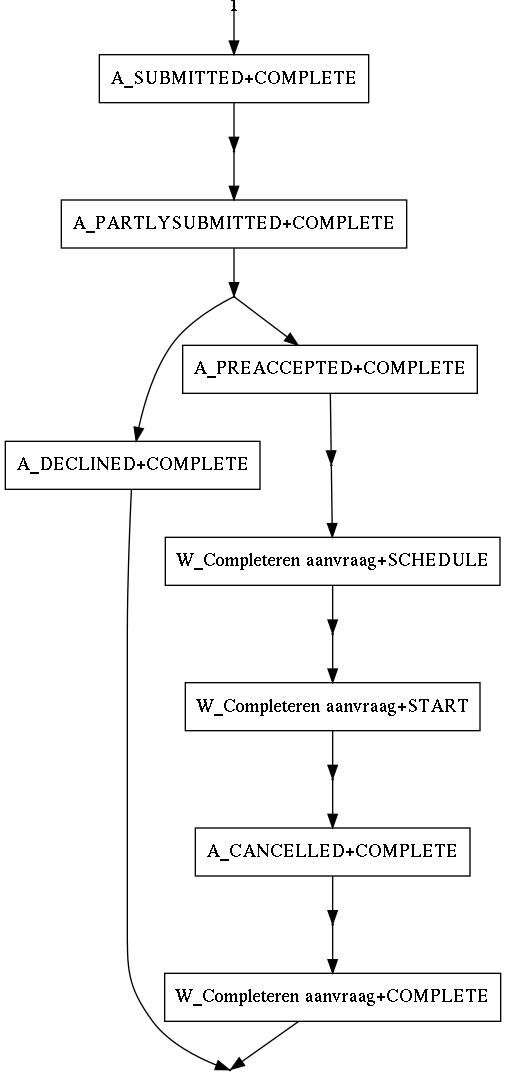

CPU times: user 2 s, sys: 312 ms, total: 2.31 s
Wall time: 2.69 s


(<pm4py.objects.petri.petrinet.PetriNet at 0x7f70dbeb7ed0>,
 ['start:1'],
 ['end:1'])

In [128]:
%time run_simple_miner(log)

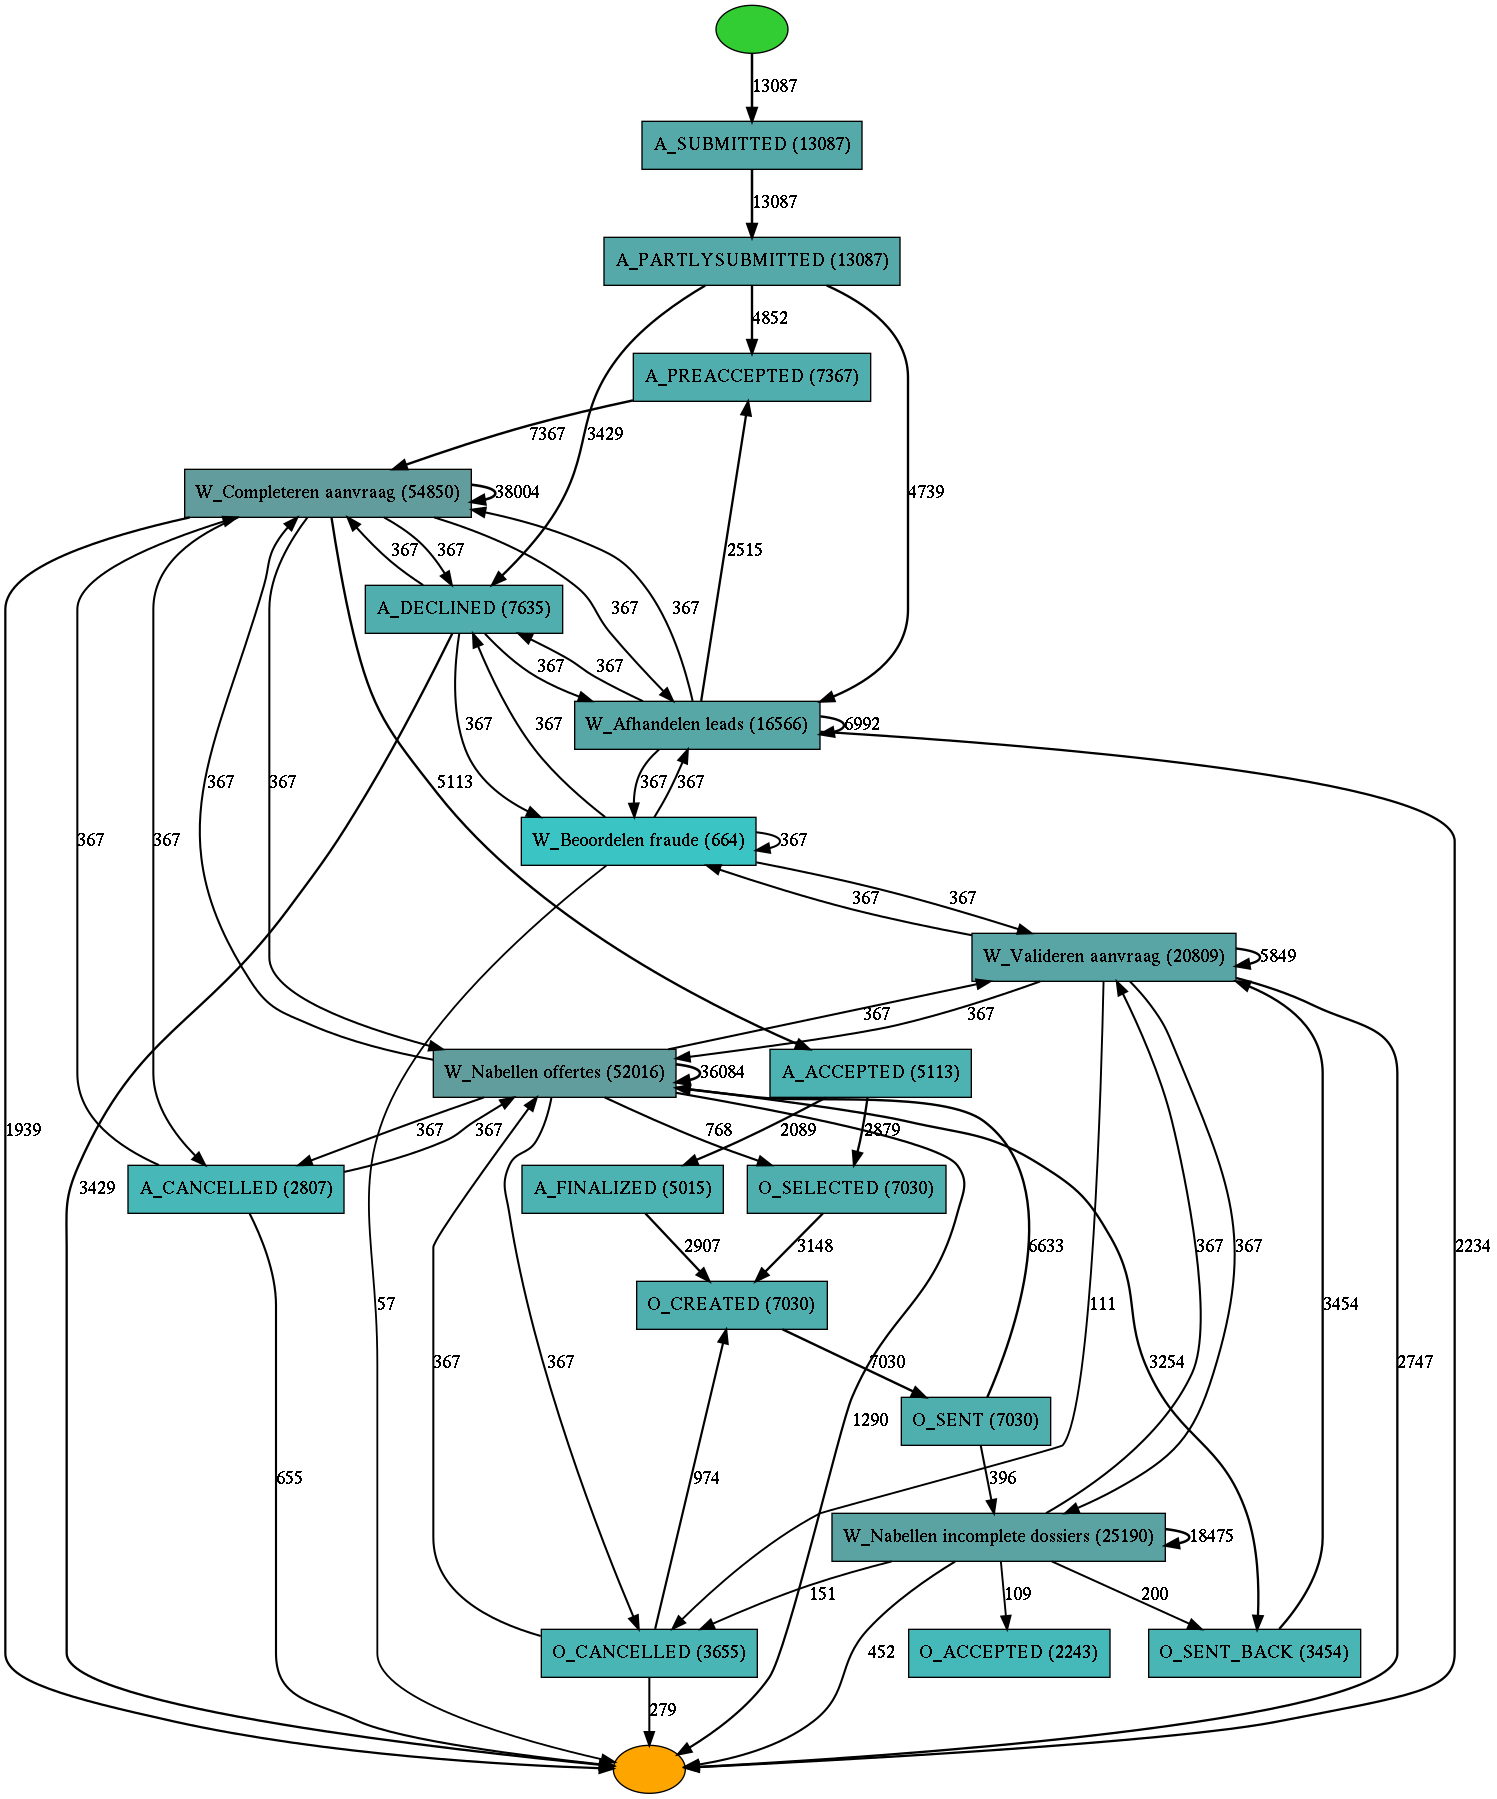

CPU times: user 1.21 s, sys: 64.1 ms, total: 1.28 s
Wall time: 1.44 s


{'A_SUBMITTED': (node:A_SUBMITTED connections:{A_PARTLYSUBMITTED:[0.9999235941320294]}), 'A_PARTLYSUBMITTED': (node:A_PARTLYSUBMITTED connections:{A_PREACCEPTED:[0.9997939418916134], A_DECLINED:[0.9997084548104956], W_Afhandelen leads:[0.999789029535865]}), 'A_PREACCEPTED': (node:A_PREACCEPTED connections:{W_Completeren aanvraag:[0.9998642779587406]}), 'A_DECLINED': (node:A_DECLINED connections:{W_Afhandelen leads:[0], W_Completeren aanvraag:[0], W_Beoordelen fraude:[0]}), 'W_Afhandelen leads': (node:W_Afhandelen leads connections:{W_Afhandelen leads:[0.9998569998569998], A_PREACCEPTED:[0.9996025437201908], A_DECLINED:[0], W_Beoordelen fraude:[0], W_Completeren aanvraag:[0]}), 'W_Completeren aanvraag': (node:W_Completeren aanvraag connections:{W_Completeren aanvraag:[0.9999736876726747], A_ACCEPTED:[0.9998044583496285], W_Afhandelen leads:[0], A_CANCELLED:[0], A_DECLINED:[0], W_Nabellen offertes:[0]}), 'A_ACCEPTED': (node:A_ACCEPTED connections:{O_SELECTED:[0.9996527777777777], A_FINAL

In [129]:
%time run_heuristic_miner(log)

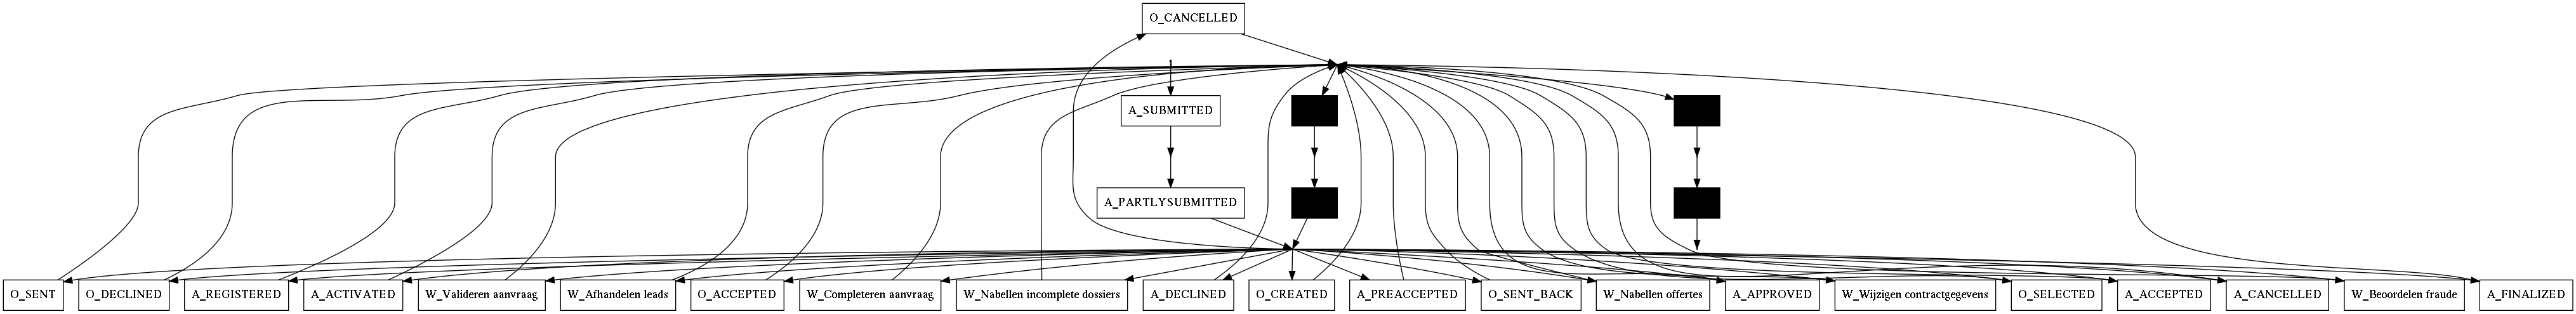

CPU times: user 555 ms, sys: 32.5 ms, total: 587 ms
Wall time: 706 ms


(<pm4py.objects.petri.petrinet.PetriNet at 0x7f70bf9a9290>,
 ['source:1'],
 ['sink:1'])

In [130]:
%time induc_miner(log)

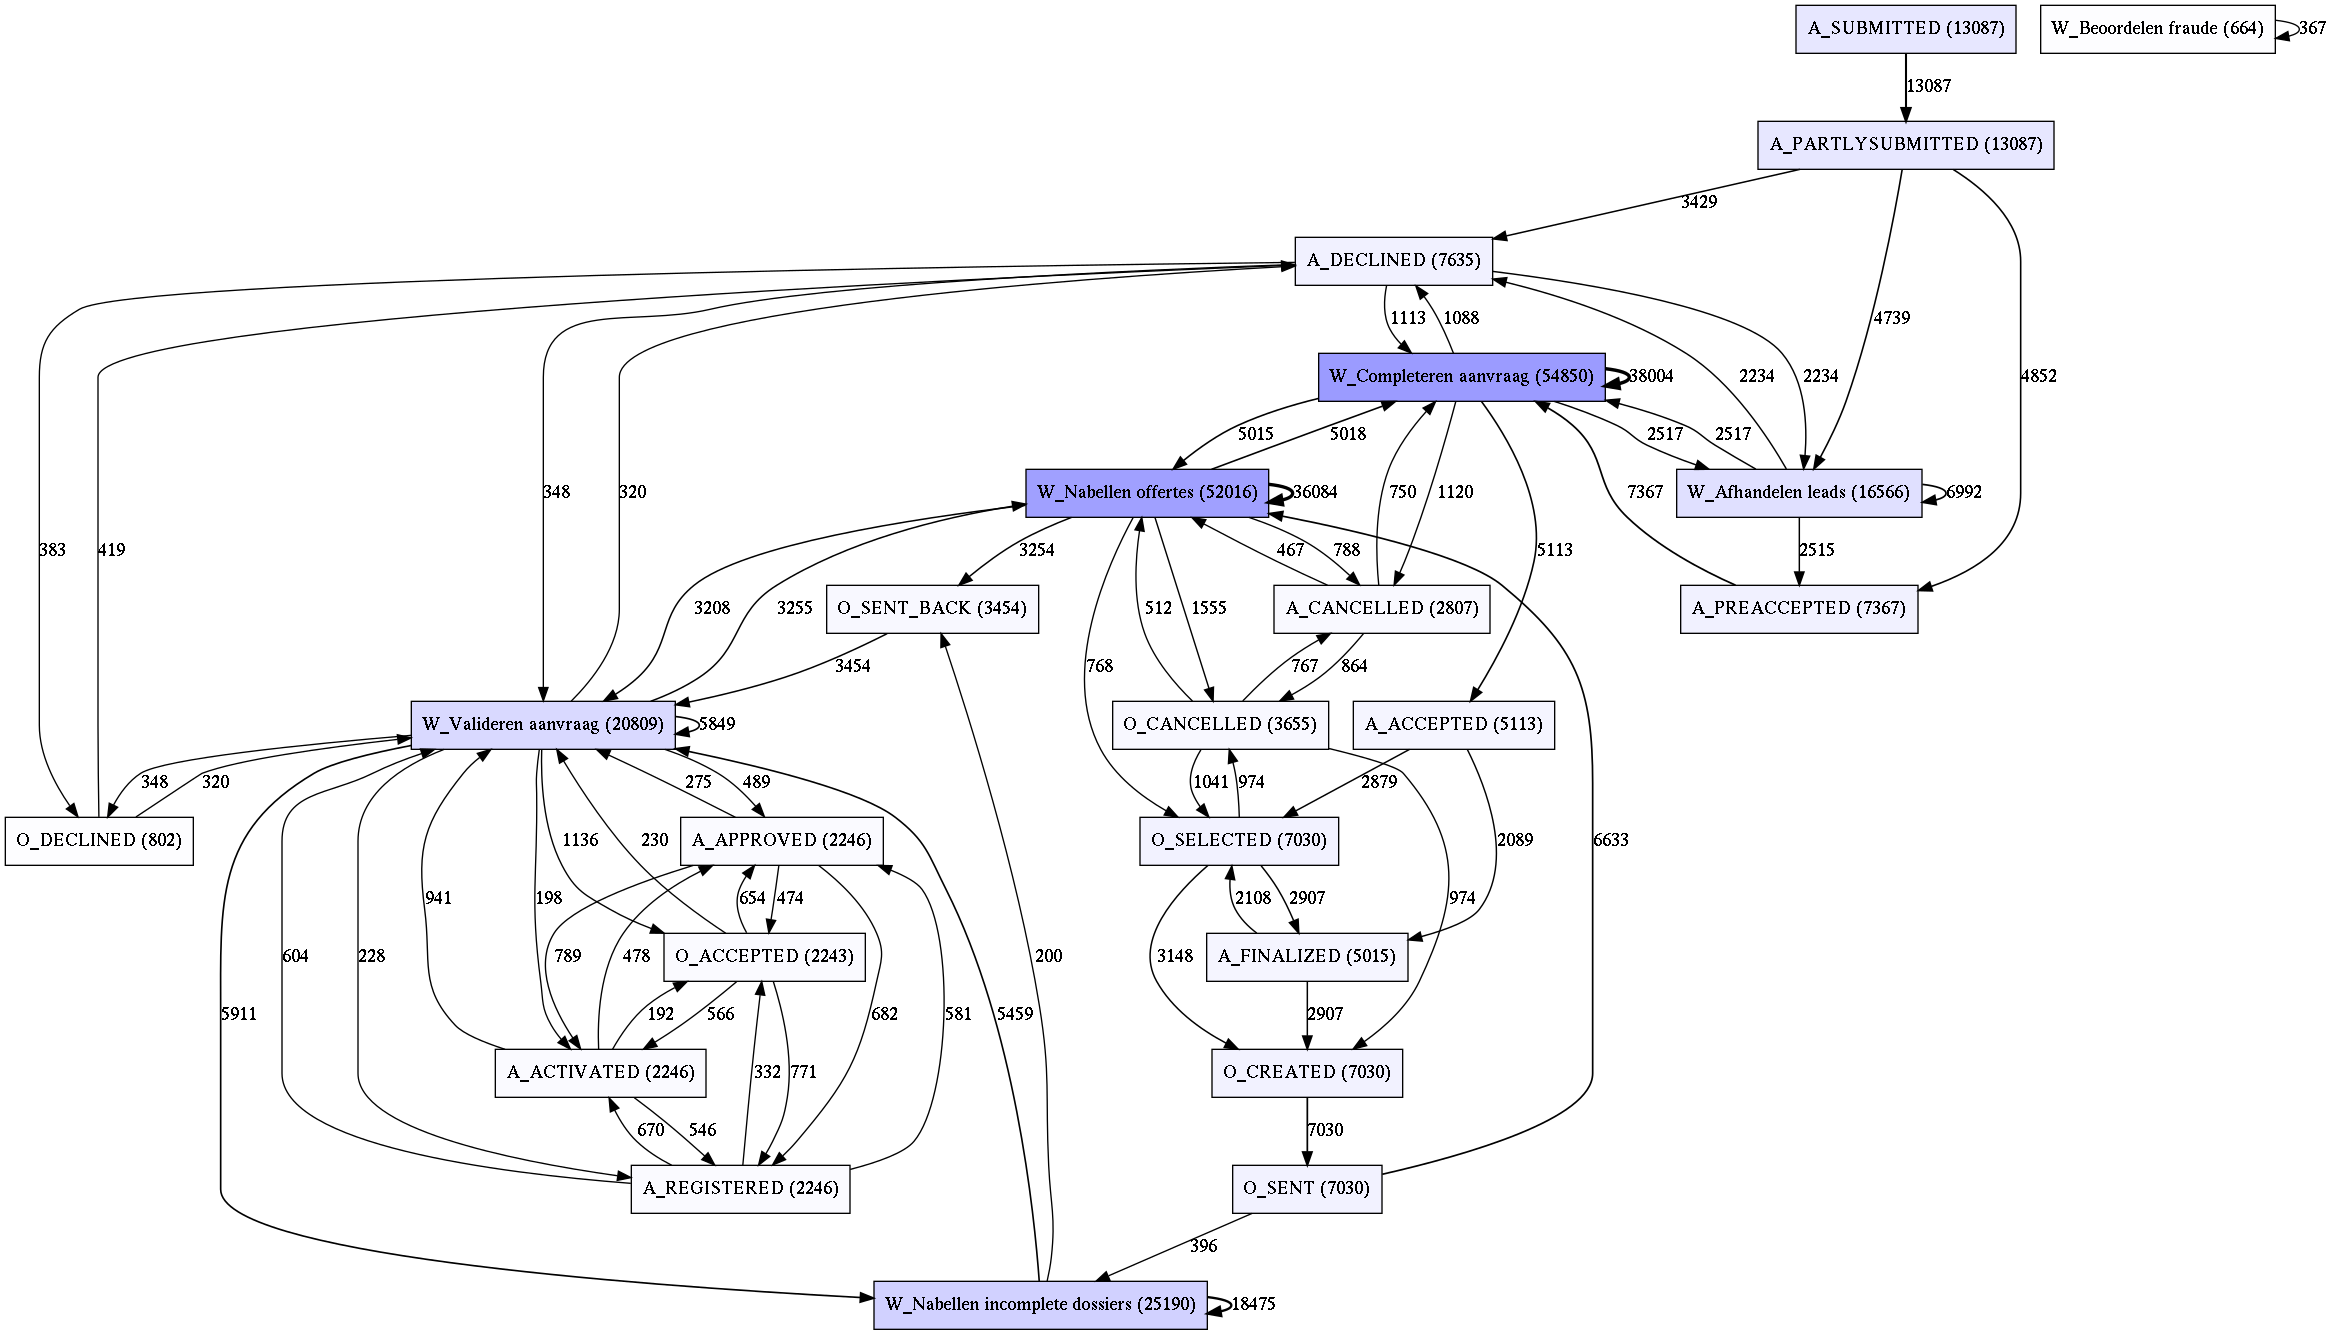

CPU times: user 469 ms, sys: 48.1 ms, total: 517 ms
Wall time: 682 ms


Counter({('A_SUBMITTED', 'A_PARTLYSUBMITTED'): 13087,
         ('A_PARTLYSUBMITTED', 'A_PREACCEPTED'): 4852,
         ('A_PREACCEPTED', 'W_Completeren aanvraag'): 7367,
         ('W_Completeren aanvraag', 'W_Completeren aanvraag'): 38004,
         ('W_Completeren aanvraag', 'A_ACCEPTED'): 5113,
         ('A_ACCEPTED', 'O_SELECTED'): 2879,
         ('O_SELECTED', 'A_FINALIZED'): 2907,
         ('A_FINALIZED', 'O_CREATED'): 2907,
         ('O_CREATED', 'O_SENT'): 7030,
         ('O_SENT', 'W_Nabellen offertes'): 6633,
         ('W_Nabellen offertes', 'W_Completeren aanvraag'): 5018,
         ('W_Completeren aanvraag', 'W_Nabellen offertes'): 5015,
         ('W_Nabellen offertes', 'W_Nabellen offertes'): 36084,
         ('W_Nabellen offertes', 'O_SENT_BACK'): 3254,
         ('O_SENT_BACK', 'W_Valideren aanvraag'): 3454,
         ('W_Valideren aanvraag', 'W_Nabellen offertes'): 3255,
         ('W_Nabellen offertes', 'W_Valideren aanvraag'): 3208,
         ('W_Valideren aanvraag', 'A_REGIST

In [131]:
%time run_dfg_miner(log)

## nxpd, networkx, interactive jupyter

In [24]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [28]:

def f(x,y):
    return x,y

In [49]:
interact(f, no_variants=20);



interactive(children=(IntSlider(value=20, description='no_variants', max=60, min=-20), Output()), _dom_classes…

In [39]:
from pm4py.algo.discovery.simple.model.log import factory as simple_algorithm



In [48]:
def f(no_variants=50):
    net, initial_marking, final_marking = simple_algorithm.apply(log, classic_output=True, parameters={"max_no_variants": 20})
    gviz = vis_factory.apply(net, initial_marking, final_marking)

    display(vis_factory.view(gviz))


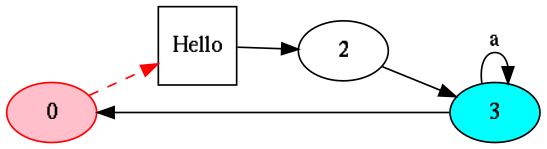

In [154]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
G = nx.DiGraph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 120
G.add_cycle(range(4))
G.add_node(0, color='red', style='filled', fillcolor='pink')
G.add_node(1,label='Hello', shape='square')
G.add_node(3, style='filled', fillcolor='#00ffff')
G.add_edge(0, 1, color='red', style='dashed')
G.add_edge(3, 3, label='a')
draw(G)

In [76]:
def f(x):
    print(x)
    G = nx.DiGraph()
    G.graph['rankdir'] = 'LR'
    G.graph['dpi'] = 120
    for i in range(x):
        G.add_node(x, color='red', style='filled', fillcolor='pink')
        G.add_edge(0, i, label='a')

 
    return draw(G)

In [78]:
def k(k):
    interact(f,x=k)

In [79]:
k(5)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

## Conformance Checking

In [139]:
#export
from pm4py.algo.conformance.tokenreplay import factory as token_replay
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory


In [136]:
from pm4py.algo.conformance.tokenreplay import factory as token_replay

replay_result = token_replay.apply(log, net, initial_marking, final_marking)

In [137]:
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

log_fitness = replay_fitness_factory.evaluate(replay_result, variant="token_replay")

In [148]:
#export
def replay(log, net, initial_marking, final_marking):
    replay_result = token_replay.apply(log, net, initial_marking, final_marking)
    log_fitness = replay_fitness_factory.evaluate(replay_result, variant="token_replay")
    return log_fitness

def replay2(log, net, initial_marking, final_marking):
    replay_result = token_replay.apply(log, net, initial_marking, final_marking)
    acc=0
    for x in replay_result:
        if x['trace_is_fit']:
            acc+=1
        
    return acc/len(replay_result)

In [138]:
log_fitness

{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0}

## Export 

In [150]:
! /home/lahann/anaconda3/envs/fastpm/bin/python notebook2script.py 04_fastpm_pm4py.ipynb

Converted 04_fastpm_pm4py.ipynb to exp/pm4py.py


In [15]:
%load_ext memory_profiler


In [159]:
%memit log2=import_xes(str(bpic2012))

peak memory: 902.86 MiB, increment: 227.50 MiB


In [19]:
bpic2017=untar_data(URLs.BPIC_2017)
%memit log3=import_xes(str(bpic2017))

BPIC_2017/BPI_Challenge_2017.xes.gz
peak memory: 2114.21 MiB, increment: 1908.12 MiB


In [25]:
#bpic2018=untar_data(URLs.BPIC_2018)
%memit log3=import_xes('/home/lahann/.fastpm/data/BPIC_2018/BPI_Challenge_2018.xes')

SyntaxError: invalid or missing encoding declaration for '/home/lahann/.fastpm/data/BPIC_2018/BPI_Challenge_2018.xes' (<string>)

In [23]:
str(untar_data(URLs.BPIC_2018))

BPIC_2018/BPI_Challenge_2018.xes
not supported compression format


'/home/lahann/.fastpm/data/BPIC_2018/BPI_Challenge_2018.xes'

Object `untar_data` not found.
